***

# PROBLEM DEFINITION

## Given:

    - Transient 2-D heat conduction through a plate
    
    - Plate Dimensions: Lx = 0.3 m, Ly = 0.4 m, and Lz = 0.02 m
    
## Initial Condition:

    - Plate is initially at a uniform temperature of 523.15 K
    
## Boundary Conditions:

    - East and South boundaries are insulated for part (a). 
    
    - South boundary is exposed to a net flux of 50 kW/m^2 for part (b)
    
    - West boundary is exposed to 20 kW/m^2
    
    - North boundary is fixed at T = 373.15 K

## Solve using implicit finite volume method:

    a) temperature distribution of the plate at t = 20 seconds and at steady state
    
    b) temperature distribution of the plate at t = 40 seconds and at steady state
    
    c) compare part b) using fully explicit finite volume method

***

# GOVERNING EQUATION FOR TRANSIENT 2-D DIFFUSION WITH NO SOURCES

***

* Starting from:

$$\frac{\partial \left(\rho \phi\right)}{\partial t} = div\left(\Gamma grad \phi \right)$$


* Integrating over control volume and with respect to time

$$\int_{\Delta t} \frac{\partial}{\partial t}\left(\int_{cv} \rho \phi dV\right) dt  = \int_{\Delta t} \int_{cv} div\left(\Gamma grad \phi\right)dVdt$$


* Applying Gauss divergence theorem to the diffusion term:

$$\int_{\Delta t} \frac{\partial}{\partial t}\left(\int_{cv} \rho \phi dV\right) dt  = \int_{\Delta t} \int_{A} n . \left(\Gamma grad \phi\right)dAdt$$


* For a 2-D Problem:

$$\int_{\Delta t} \frac{\partial}{\partial t}\left(\int_{A} \rho \phi L_z dA \right) dt  = \int_{\Delta t} \int_{A} n . \left(\Gamma grad \phi\right)dAdt$$

* Approximation of the transient term:

$$\int_{\Delta t} \frac{\partial}{\partial t}\left(\int_{A} \rho \phi L_z dA \right) dt =  \rho \Delta x \Delta y L_z \left[\phi_P^1 - \phi_P^0\right]$$



* Approximation of the diffusion term

$$\int_{\Delta t} \int_{A} n . \left(\Gamma grad \phi\right)dAdt = \int_t^{t+\Delta t} \int_s^n \int_w^e n . \left(\Gamma grad \phi\right)dx dy dt$$

$$\int_t^{t+\Delta t} \int_s^n \int_w^e n . \left(\Gamma grad \phi\right)dx dy dt = f\left[\frac{\Gamma_e\left(\phi_E - \phi_P\right)\Delta y}{\left(\delta x\right)_e} - \frac{\Gamma_w\left(\phi_P - \phi_W\right)\Delta y}{\left(\delta x\right)_w}\right]^1 L_z \Delta t + \left(1-f\right)\left[\frac{\Gamma_e\left(\phi_E - \phi_P\right)\Delta y}{\left(\delta x\right)_e} - \frac{\Gamma_w\left(\phi_P - \phi_W\right)\Delta y}{\left(\delta x\right)_w}\right]^0 L_z \Delta t + f\left[\frac{\Gamma_n\left(\phi_N - \phi_P\right)\Delta x}{\left(\delta y\right)_n} - \frac{\Gamma_s\left(\phi_P - \phi_S\right)\Delta x}{\left(\delta y\right)_s}\right]^1 L_z\Delta t + \left(1-f\right)\left[\frac{\Gamma_n\left(\phi_N - \phi_P\right)\Delta x}{\left(\delta y\right)_n} - \frac{\Gamma_s\left(\phi_P - \phi_S\right)\Delta x}{\left(\delta y\right)_s}\right]^0 L_z\Delta t$$



* Combining all terms ($L_z$ cancels out):

$$\rho \Delta x \Delta y \left[\phi_P^1 - \phi_P^0\right] = f\left[\frac{\Gamma_e\left(\phi_E - \phi_P\right)\Delta y}{\left(\delta x\right)_e} - \frac{\Gamma_w\left(\phi_P - \phi_W\right)\Delta y}{\left(\delta x\right)_w}\right]^1 \Delta t + \left(1-f\right)\left[\frac{\Gamma_e\left(\phi_E - \phi_P\right)\Delta y}{\left(\delta x\right)_e} - \frac{\Gamma_w\left(\phi_P - \phi_W\right)\Delta y}{\left(\delta x\right)_w}\right]^0 \Delta t + f\left[\frac{\Gamma_n\left(\phi_N - \phi_P\right)\Delta x}{\left(\delta y\right)_n} - \frac{\Gamma_s\left(\phi_P - \phi_S\right)\Delta x}{\left(\delta y\right)_s}\right]^1 \Delta t + \left(1-f\right)\left[\frac{\Gamma_n\left(\phi_N - \phi_P\right)\Delta x}{\left(\delta y\right)_n} - \frac{\Gamma_s\left(\phi_P - \phi_S\right)\Delta x}{\left(\delta y\right)_s}\right]^0 \Delta t$$

***

# Fully Implicit Scheme (f = 1)
***

* Internal Control Volumes:

$$a_p \phi_P = a_e \phi_E + a_w \phi_W + a_n \phi_N + a_s \phi_S + a_p^0 \phi_P^0$$

$$a_e = \frac{\Gamma_e \Delta y}{\left(\delta x\right)_e}, \: a_w = \frac{\Gamma_w \Delta y}{\left(\delta x\right)_w}$$

$$a_n = \frac{\Gamma_n \Delta x}{\left(\delta y\right)_n}, \: a_s = \frac{\Gamma_s \Delta x}{\left(\delta y\right)_s}$$

$$a_p^0 = \frac{\rho \Delta x \Delta y}{\Delta t}$$

$$a_p = a_e + a_w + a_n + a_s + a_p^0$$

 - For steady Problem: $a_P^0 = 0$


## Boundary Conditions

* The following expressions are relevant to the problem being solved here. For more general boundary conditions, see the appendix. 


    - South-West Corner (i = 0, j = 0)

        $$a_p \phi_P = a_e \phi_E + a_n \phi_N +  a_p^0 \phi_P^0 + q_w + q_s$$

        $$a_p = a_e + a_n + a_p^0$$

    - South-East Corner ( i = Nx-1, j = 0)

        $$a_p \phi_P = a_w \phi_W + a_n \phi_N + a_p^0 \phi_P^0 + q_s - q_e $$

        $$a_p = a_w + a_n + a_p^0$$

    - North-West Corner ( i = 0, j = Ny-1 )

        $$a_p \phi_P = a_e \phi_E + a_s \phi_S + a_p^0 \phi_P^0 + q_w + a_n \phi_N^*$$

        $$a_p = a_e + a_n + a_s + a_p^0 $$

    - North-East Corner (i = Nx-1, j = Ny-1)

        $$a_p\phi_P = a_w \phi_W + a_s\phi_s + a_p^0\phi_P^0 - q_e + a_n\phi_N^*$$

        $$a_p = a_w + a_s + a_n + a_p^0$$

    - Other Boundary Points on West Edge (i = 0, 0 < j < Ny-1 )

        $$a_p \phi_P = a_e \phi_E + a_n \phi_N  + a_s \phi_S + a_p^0 \phi_P^0 + q_w$$

        $$a_p = a_p^0 + a_e + a_n + a_s$$

    - Other Boundary Points on East Edge (i = Nx - 1, 0 < j < Ny-1):

        $$a_p \phi_P = a_w \phi_W + a_n \phi_N + a_s\phi_S + a_p^0\phi_P^0 - q_e$$

        $$a_p = a_p^0 + a_w + a_n + a_s$$

    - Other Boundary Points on South Edge (0 < i < Nx-1, j = 0)

        $$a_p \phi_P = a_e \phi_E + a_w \phi_W + a_n \phi_N + a_p^0\phi_P^0  + q_s$$

        $$a_p = a_e + a_w + a_n + a_p^0$$

    - Other Boundary Points on North Edge (0 < i < Nx-1, j = Ny-1)

        $$a_p \phi_P = a_e \phi_E + a_w\phi_W + a_s\phi_S + a_p\phi_P^0 + a_n\phi_N^*$$

        $$a_p = a_e + a_w + a_n + a_s + a_p^0$$

***
# Fully Explicit Scheme (f = 0)
***

* Internal Control Volumes:

$$a_p \phi_p = a_e \phi_E^0 + a_w \phi_W^0 + a_n \phi_N^0 + a_s \phi_S^0 + \left[a_p^0 - a_e - a_w - a_n - a_s \right]\phi_P^0$$

$$a_e = \frac{\Gamma_e \Delta y}{\left(\delta x\right)_e}, \: a_w = \frac{\Gamma_w \Delta y}{\left(\delta x\right)_w}$$

$$a_n = \frac{\Gamma_n \Delta x}{\left(\delta y\right)_n}, \: a_s = \frac{\Gamma_s \Delta x}{\left(\delta y\right)_s}$$

$$a_p^0 = \frac{\rho \Delta x \Delta y}{\Delta t}$$

$$a_p = a_p^0$$

## Boundary Conditions


* (i = 0 and j = 0)

$$a_p \phi_P = a_e \phi_E^0 + qw + a_n \phi_N^0 + qs + \left[ a_p^0  - a_e - a_n\right]\phi_P^0 $$

* (i = Nx-1 and j = 0)

$$a_p \phi_P = -qe + a_w \phi_W^0 + a_n \phi_N^0 + qs + \left[ a_p^0 - a_w - a_n\right] \phi_P^0$$


* (i = 0 and j = Ny-1)

$$a_p \phi_P = a_e \phi_E^0 + q_w + a_n \phi_N^b + a_s \phi_S^0 + \left[a_p^0 - a_e - a_n - a_s\right] \phi_P^0$$

* (i = Nx-1 and j = Ny-1)

$$a_p \phi_P = -qe + a_w \phi_W^0 + a_n \phi_N^b + a_s \phi_S^0 + \left[a_p^0 - a_w - a_n - a_s\right]\phi_P^0$$

* (i = 0 and 0 < j < Ny-1)

$$a_p \phi_P = a_e \phi_E^0 + qw + a_n \phi_N^0 + a_s \phi_S^0 + \left[a_p^0 - a_e - a_n - a_s\right] \phi_P^0 $$

* (0 < i < Nx - 1 and j = 0)

$$a_p \phi_P = a_e \phi_E^0 + a_w \phi_W^0 + a_n \phi_N^0 + q_s + \left[a_p^0 - a_e - a_w - a_n\right] \phi_P^0 $$

* (0 < i < Nx-1 and j = Ny-1)

$$a_p \phi_P = a_e \phi_E^0 + a_w \phi_W^0 + a_n \phi_N^b + a_s \phi_S^0 + a_s \phi_S^0 + \left[a_p^0 - a_e - a_w - a_n - a_s\right]\phi_P^0 $$

* (i = Nx-1 and 0 < j < Ny-1)

$$a_p \phi_P = a_w \phi_W^0 - qe + a_n \phi_N^0 + a_s \phi_S^0 + \left[a_p^0 - a_w - a_n - a_s\right] \phi_P^0$$


* For steady problem: 

$$\phi_P = (a_e/a_p) \phi_E^* + (a_w/a_p) \phi_W^* + (a_n/a_p) \phi_N^* + (a_s/a_p) \phi_S^*$$

$$a_p = a_e + a_w +  a_n + a_s$$

***


# IMPORT MODULES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl

mpl.rcParams['legend.frameon'] = False
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.xmargin'] = 0.01
mpl.rcParams['axes.ymargin'] = 0.01
mpl.rcParams['grid.alpha'] = 1.0
mpl.rcParams['grid.linestyle'] = 'dotted'
mpl.rcParams['grid.color'] = 'gray'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['xtick.major.size'] = 5.0
mpl.rcParams['ytick.major.size'] = 5.0
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.monospace'] = 'Helvetica'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True 
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#1B9E77', '#D95F02', '#7570B3', '#E7298A', '#66A61E', '#E6AB02', '#A6761D', '#666666'])

# TRIDIAGONAL MATRIX SOLVER

In [2]:
def tdma(a,b,c,d):
    """
    Tridiagonal matrix algorithm based on the book ‘Numerical Heat Transfer and Fluid Flow’ by Patankar
    
    Input parameters
    ----------------
    a: vector of aw's (dense form)
    b: vector of ap's
    c: vector of ae's (dense form)
    d: vector of other knowns
    
    Output parameters
    -----------------
    x: Vector of solved dependent variable
    """
    
    n = len(d)
    x = np.zeros(n)
    P = np.zeros(n)
    Q = np.zeros(n)
    # Calculate P1 and Q1
    P[0] = c[0]/b[0]
    Q[0] = d[0]/b[0]
    # Calculate recurrence relations
    for i in range(1,n):
        P[i] = c[i]/(b[i] - a[i]*P[i-1])
        Q[i] = (d[i] + a[i]*Q[i-1])/(b[i] - a[i]*P[i-1])
    # set xn = Qn
    x[-1] = Q[-1]
    # back substitute to obtain final solution
    for i in range(n-2,-1,-1):
        x[i] = P[i]*x[i+1] + Q[i]
    # return solution
    return x

# CHECK IMPLEMENTATION OF TRIDIAGONAL MATRIX SOLVER

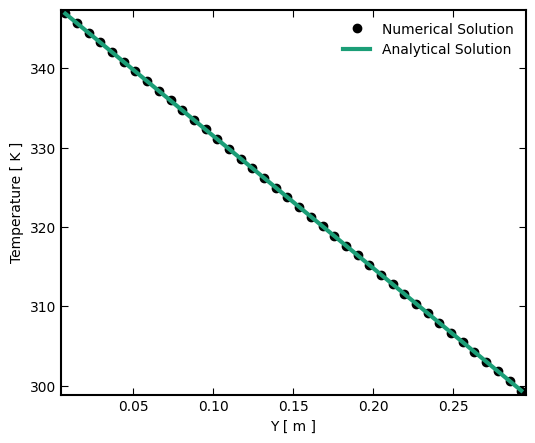

In [3]:
# Length of the domain
Ly = 0.3

# Thermal conductivity
k = 1000.0

# Number of control volumes in the y coordinate
Ny = 40

# Length of individual control volume
dy = Ly/Ny

# Boundary Conditions
Ts = 348.15
Tn = 298.15

# coefficients
a_s = k/dy
a_n = k/dy
ap = a_s + a_n

# Diagonals (dense form)
a = a_s*np.ones(Ny)
a[0] = 0.0
b = ap*np.ones(Ny)
c = a_n*np.ones(Ny)
c[-1] = 0.0

d = np.zeros(Ny)
d[0] = d[0] + k/dy*Ts
d[-1] = d[-1] + k/dy*Tn

# Numerical solution using tridiagonal matrix solver
T = tdma(a,b,c,d)

# Analytical Solution
yrange = np.linspace(dy, Ly-dy, Ny)
Ta = (Tn - Ts)/Ly * yrange + Ts

# Graphical comparison of numerical and analytical solution
plt.figure(figsize=[6,5])
plt.plot(yrange, T, 'ko', label = 'Numerical Solution')
plt.plot(yrange, Ta, label = 'Analytical Solution')
plt.xlabel('Y [ m ]')
plt.ylabel('Temperature [ K ]')
plt.legend()
plt.show()

# FUNCTION FOR CREATING BOUNDARY CONDITIONS

In [4]:
def boundaryCondition(btype, pos, value, gamma, dx, dy):
    """
    call to construct a boundary condition. Available types include Dirichlet (fixed value) and Neuman (fixed gradient)
    
    Cannot handle mixed boundary (e.g convection at surface) but can be extended to cover it
    
    Input Parameters
    -----------------
    btype : integer representing boundary type. 0 for constant value, 1 for constant flux
    pos   : integer representing location of constant value or orientation/location of constant flux
    value : float representing the value of the dependent variable/flux at the boundary
    gamma : float representing the value of diffusion coefficient
    dx    : float representing the length of the control volume in x coordinate
    dy    : float representing the height of the control volume in y coordinate
    
    Output parameters
    ----------------
    bc    : modified value of boundary condition. Ready to be added directly to the discretized equation
    """
    # specified value
    if(btype == 0):
        # west or east
        if(pos == 0):
            bc = gamma/dx*dy*value
        # south or north
        elif(pos == 1):
            bc = gamma/dy*dx*value
    # specified flux
    elif(btype == 1):
        if(pos == 0):
            bc = value
        # south or north
        elif(pos == 1):
            bc = -value
    return bc

# FUNCTION FOR PERFORMING HORIZONTAL SWEEP

In [5]:
def hsweep(aw, ae, a_s, a_n, apo, gamma, dx, dy, Nx, Ny, bc1, bc2, bc3, bc4, phic, phit, start, stop, step):
    
    """
    Performs a horizontal sweep in the line by line method
    
    Uses triadiagonal matrix solver to solve each line
    
    Function was made specifically for this assignment to make it readable. For a more general function, see appendix B
    
    Input Parameters:
    ----------------
    aw:    west coefficient
    ae:    east coefficient
    a_s:   south coefficient
    a_n:   north coefficient
    apo:   transient coefficient
    
    gamma: diffusion coefficient
    dx:    length of control volume in x
    dy:    width of control volume in y direction
    Nx:    Number of control volumes in x direction
    Ny:    Number of control volumes in y direction
    
    bc1:   list containing information about west boundary condition bc1 = [btype, pos, value]
           btype = 0 corresponds with fixed value and btype = 1 corresponds with flux
           pos = 0 corresponds with west/east/flux in, pos = 1 corresponds with south/north/flux out 
    bc2:   list containing information about the east boundary condition
    bc3:   list containing information about the south boundary condition
    bc4:   list containing information about the north boundary condition
    
    phic:  initial guess of phi field from previous iteration
    phit:  initial guess of phi field from previous time step
    
    start: integer representing the starting point. 0 for sweeping south to north, Ny-1 for sweeping north to south
    stop:  integer representing the stopping point. Ny-1 for sweeping south to north, -1 for sweeping north to south
    step:  integer representing the step size. 1 for sweeping south to north, -1 for sweeping north to south
           
    Output Parameters:
    -----------------
    phi:   Solved phi field
    """
    
    # boundary conditions
    bcw = boundaryCondition(bc1[0], bc1[1], bc1[2], gamma, dx, dy)
    bce = boundaryCondition(bc2[0], bc2[1], bc2[2], gamma, dx, dy)
    bcs = boundaryCondition(bc3[0], bc3[1], bc3[2], gamma, dx, dy)
    bcn = boundaryCondition(bc4[0], bc4[1], bc4[2], gamma, dx, dy)
    
    # initialize output variable
    phi = np.zeros((Nx,Ny))
    
    # construct vector a
    a =  a_s*np.ones(Ny)
    a[0] = 0.0
    
    # construct vector c
    c = a_n*np.ones(Ny)
    c[-1] = 0.0
    
    # perform a horizontal sweep
    for i in range(start,stop,step):
        # first line at the west edge
        if(i == 0):
            # construct vector b
            ap = apo + ae + a_n + a_s
            b = ap*np.ones(Ny)
            # correct b for south-west corner
            b[0] = ae + a_n + apo
            # correct b for north-west corner
            b[-1] = apo + ae + a_s + a_n
            
            # construct vector d
            d = ae*phic[i+1,:] + bcw + apo*phit[i,:]
            # applying south-west and north-west boundary conditions
            d[0] = d[0] + bcs
            d[-1] = d[-1] + bcn
        # Last line at the east edge
        elif(i == Nx - 1):
            ap = apo + aw + a_n + a_s
            b = ap*np.ones(Ny)
            b[0] = apo + aw + a_n
            b[-1] = apo + aw + a_s + a_n
            
            d = aw*phic[i-1,:] - bce + apo*phit[i,:]
            d[0] = d[0] + bcs
            d[-1] = d[-1] + bcn
        # all other lines between west and east boundaries
        else:
            ap = ae + aw + a_s + a_n + apo
            b = ap*np.ones(Ny)
            b[0] = ae + aw + a_n + apo
            b[-1] = ae + aw + a_s + a_n + apo
            
            d = ae*phic[i+1,:] + aw*phic[i-1,:] + apo*phit[i,:]
            d[0] = d[0] + bcs
            d[-1] = d[-1] + bcn
        # solve using tdma solver
        phi[i,:] = tdma(a,b,c,d)
            
    return phi

# FUNCTION FOR PERFORMING VERTICAL SWEEP

In [6]:
def vsweep(aw, ae, a_s, a_n, apo, gamma, dx, dy, Nx, Ny, bc1, bc2, bc3, bc4, phic, phit, start, stop, step):
    
    """
    Performs a vertical sweep in the line by line method
    
    Uses triadiagonal matrix solver to solve each line
    
    Function was made specifically for this assignment to make it readable. For a more general function, see appendix C
    
    Input Parameters:
    ----------------
    aw:    west coefficient
    ae:    east coefficient
    a_s:   south coefficient
    a_n:   north coefficient
    apo:   transient coefficient
    
    gamma: diffusion coefficient
    dx:    length of control volume in x
    dy:    width of control volume in y direction
    Nx:    Number of control volumes in x direction
    Ny:    Number of control volumes in y direction
    
    bc1:   list containing information about west boundary condition bc1 = [btype, pos, value]
           btype = 0 corresponds with fixed value and btype = 1 corresponds with flux
           pos = 0 corresponds with west/east/flux in, pos = 1 corresponds with south/north/flux out 
    bc2:   list containing information about the east boundary condition
    bc3:   list containing information about the south boundary condition
    bc4:   list containing information about the north boundary condition
    
    phic:  initial guess of phi field from previous iteration
    phit:  initial guess of phi field from previous time step
    
    start: integer representing the starting point. 0 for sweeping south to north, Ny-1 for sweeping north to south
    stop:  integer representing the stopping point. Ny-1 for sweeping south to north, -1 for sweeping north to south
    step:  integer representing the step size. 1 for sweeping south to north, -1 for sweeping north to south
           
    Output Parameters:
    -----------------
    phi:   Solved phi field
    """
    
    # boundary conditions
    bcw = boundaryCondition(bc1[0], bc1[1], bc1[2], gamma, dx, dy)
    bce = boundaryCondition(bc2[0], bc2[1], bc2[2], gamma, dx, dy)
    bcs = boundaryCondition(bc3[0], bc3[1], bc3[2], gamma, dx, dy)
    bcn = boundaryCondition(bc4[0], bc4[1], bc4[2], gamma, dx, dy)
    
    # initialize output variable
    phi = np.zeros((Nx,Ny))
    
    # construct vector a
    a =  aw*np.ones(Nx)
    a[0] = 0.0
    
    # construct vector c
    c = ae*np.ones(Nx)
    c[-1] = 0.0
    
    # perform a vertical sweep
    for j in range(start,stop,step):
        # first line at the southern edge
        if (j == 0):
            # construct vector b
            ap = apo  + ae + aw + a_n
            b = ap * np.ones(Nx)
            # correct for south-west corner
            b[0] = apo + ae + a_n
            # correct for south-east corner
            b[-1] = apo + aw + a_n
            
            # construct vector d
            d = a_n*phic[:,j+1] + bcs + apo*phit[:,j]
            # apply west boundary condition
            d[0] = d[0] + bcw
            # apply east boundary condition
            d[-1] = d[-1] + bce
        # last line at the northern edge
        elif(j == Ny-1):
            ap = apo + ae + aw + a_s + a_n
            b = ap*np.ones(Nx)
            b[0] = apo + ae + a_s + a_n
            b[-1] = apo + aw + a_s + a_n
            
            d = a_s*phic[:,j-1] + bcn + apo*phit[:,j]
            d[0] = d[0] + bcw
            d[-1] = d[-1] + bce
        # all other lines between the southern and northern edge
        else:
            ap = ae + aw + a_n + a_s + apo
            b = ap*np.ones(Nx)
            b[0] = apo  + ae + a_n + a_s
            b[-1] = apo + aw + a_n + a_s
            d = a_s*phic[:,j-1] + a_n*phic[:,j+1] + apo*phit[:,j]
            d[0] = d[0] + bcw
            d[-1] = d[-1] + bce
            
        # solve using tdma solver
        phi[:,j] = tdma(a,b,c,d)
        
    return phi

# PART A: STEADY STATE SOLUTION

In [7]:
# Length, width and depth of the domain
Lx = 0.3
Ly = 0.4


# Thermo-physical properties
k = 1000.0    # Thermal conductivity

# Number of control volumes in x and y
Nx = 30
Ny = 40

# Length and width of an individual control volume
dx = Lx/Nx
dy = Ly/Ny

# Initial condition
To = 523.15

# Boundary conditions
qw = 20000.0
qe = 0.0

qs = 0.0
Tn = 373.15

# coefficients
aw = (k/dx)*dy
ae = (k/dx)*dy
a_s = (k/dy)*dx
a_n = (k/dy)*dx
apo = 0 

## boundary conditions [boundary type, position/orientation, value]
## boundary type: 0 corresponds with fixed temperature, 1 corresponds with specified flux/gradient
## position/orientation: 0 corresponds with west/east or flux into domain, 1 corresponds with south/north or flux out of domain
## value: specified temperature or flux
bcs = [1, 0, qs]
bcn = [0, 1, Tn]
bcw = [1, 0, qw]  
bce = [1, 1, qe]

# Temperature profile at previous time. will be multiplied by zero.
Tpast = To*np.ones((Nx,Ny))

# Guess of temperature field
T = np.zeros((Nx,Ny))

# Maximum absolute error
error = 1.0 

# absolute tolerance
tol = 1.0e-8

# Number of iterations
iters = 0

while(error > tol and iters < 10000):
    # Temperature field from previous iteration. Needed to compute maximum absolute relative error
    Tprev = np.copy(T) # copying necessary to avoid pre-mature convergence
    
    # Horizontal Sweep from west to east
    T = hsweep(aw, ae, a_s, a_n, apo, k, dx, dy, Nx, Ny, bcw, bce, bcs, bcn, T, Tpast, 0, Nx-1, 1)
    
    # Horizontal sweep from east to west
    #T = hsweep(aw, ae, a_s, a_n, apo, k, dx, dy, Nx, Ny, bcw, bce, bcs, bcn, T, Tpast, Nx-1, -1, -1)
    
    # Vertical sweep from south to north
    #T = vsweep(aw, ae, a_s, a_n, apo, k, dx, dy, Nx, Ny, bcw, bce, bcs, bcn, T, Tpast, 0, Ny-1, 1)
    
    # vertical sweep from north to south
    T = vsweep(aw, ae, a_s, a_n, apo, k, dx, dy, Nx, Ny, bcw, bce, bcs, bcn, T, Tpast, Ny-1, -1, -1)
    
    # update maximum absolute relative error
    error = np.max(np.abs(T - Tprev))
    
    # update number of iterations
    iters = iters + 1

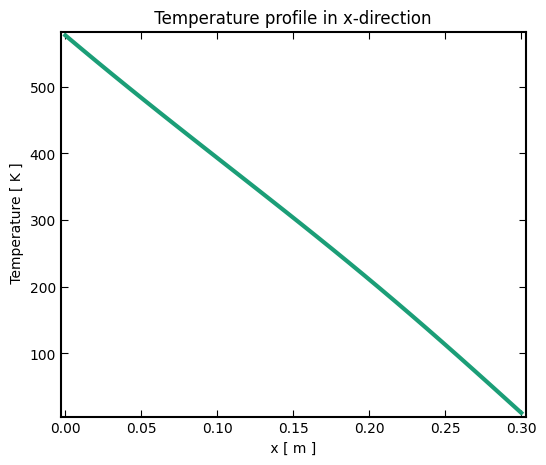

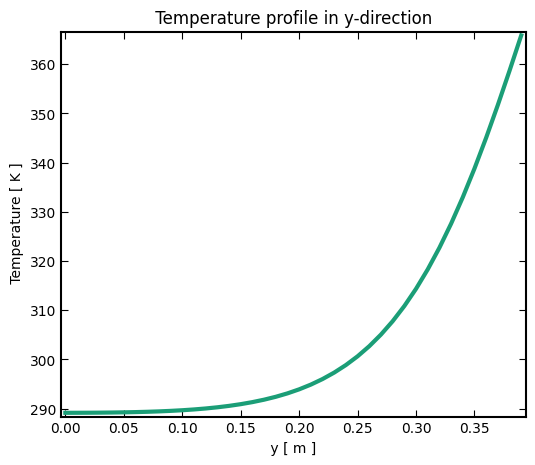

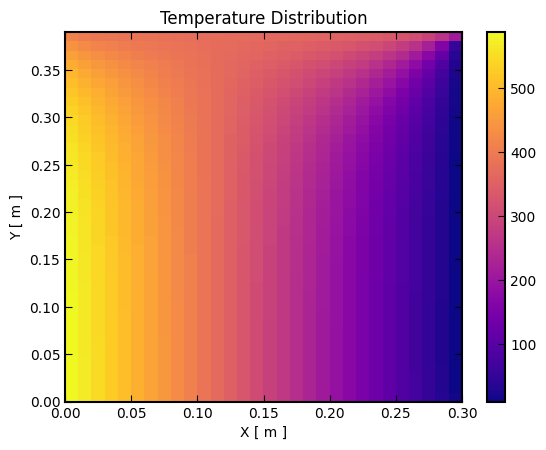

In [8]:
x = np.linspace(0,Lx,Nx)
y = np.linspace(0,Ly-dy,Ny)
# plot Temperature profile in x direction
plt.figure(figsize = [6,5])
plt.plot(x,T[:,20])
plt.xlabel(" x [ m ] ")
plt.ylabel(" Temperature [ K ]")
plt.title(" Temperature profile in x-direction ")
plt.show()
# plot temperature profile in y-direction
plt.figure(figsize = [6,5])
plt.plot(y, T[15,:])
plt.xlabel(" y [ m ] ")
plt.ylabel(" Temperature [ K ]")
plt.title(" Temperature profile in y-direction ")
plt.show()
# Plot solution surface
plt.imshow(np.transpose(T), interpolation='none', origin='lower', aspect = 'auto', cmap = 'plasma', extent=(0, Lx, 0, Ly-dy))
plt.colorbar()
plt.xlabel("X [ m ]")
plt.ylabel("Y [ m ]")
plt.title("Temperature Distribution")
plt.show()

# PART A: TRANSIENT SOLUTION

In [9]:
# Length, width and depth of the domain
Lx = 0.3
Ly = 0.4

# Thermo-physical properties
k = 1000.0    # Thermal conductivity
rhocp = 1.8e6  # volumetric heat capacity

# Number of control volumes in x and y
Nx = 30
Ny = 40

# Length and width of an individual control volume
dx = Lx/Nx
dy = Ly/Ny

# time interval (seconds)
dt = 1

# stop time (seconds)
tstop = 200

# Number of time steps
Nt = int(round(tstop/dt))

# Initial condition
To = 523.15

# Boundary conditions
qw = 20000.0
qe = 0.0

qs = 0.0
Tn = 373.15

# coefficients
aw = (k/dx)*dy
ae = (k/dx)*dy
a_s = (k/dy)*dx
a_n = (k/dy)*dx
apo = (rhocp*dx*dy)/dt

## boundary conditions [boundary type, position/orientation, value]
## boundary type: 0 corresponds with fixed temperature, 1 corresponds with specified flux/gradient
## position/orientation: 0 corresponds with west/east or flux into domain, 1 corresponds with south/north or flux out of domain
## value: specified temperature or flux
bcs = [1, 0, qs]
bcn = [0, 1, Tn]
bcw = [1, 0, qw]  
bce = [1, 1, qe]

# Re-initialize temperature field
Tt = np.zeros((Nt,Nx,Ny))
# Set initial temperature profile
Tt[0,:,:] = To*np.ones((Nx,Ny))
for t in range(1,Nt):
    # Temperature profile at previous time 
    Tpast = np.copy(Tt[t-1,:,:])
    # Guess of temperature field at current time
    T = np.zeros((Nx,Ny))
    # Maximum absolute error
    error = 1.0 
    # absolute tolerance
    tol = 1.0e-8
    # Number of iterations
    iters = 0

    while(error > tol and iters < 10000):
        # Temperature field from previous iteration. Needed to compute maximum absolute relative error
        Tprev = np.copy(T) # copying necessary to avoid pre-mature convergence
    
        # Horizontal Sweep from west to east
        T = hsweep(aw, ae, a_s, a_n, apo, k, dx, dy, Nx, Ny, bcw, bce, bcs, bcn, T, Tpast, 0, Nx-1, 1)
    
        # Horizontal sweep from east to west
        #T = hsweep(aw, ae, a_s, a_n, apo, k, dx, dy, Nx, Ny, bcw, bce, bcs, bcn, T, Tpast, Nx-1, -1, -1)
    
        # Vertical sweep from south to north
        #T = vsweep(aw, ae, a_s, a_n, apo, k, dx, dy, Nx, Ny, bcw, bce, bcs, bcn, T, Tpast, 0, Ny-1, 1)
    
        # vertical sweep from north to south
        T = vsweep(aw, ae, a_s, a_n, apo, k, dx, dy, Nx, Ny, bcw, bce, bcs, bcn, T, Tpast, Ny-1, -1, -1)
    
        # update maximum absolute relative error
        error = np.max(np.abs(T - Tprev))
    
        # update number of iterations
        iters = iters + 1
    # Store final solution at current time
    Tt[t,:,:] = np.copy(T)

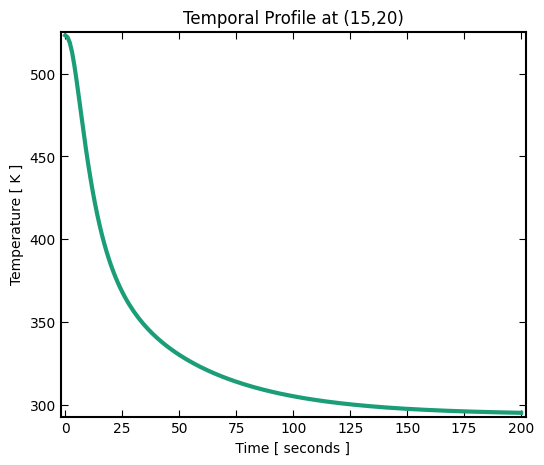

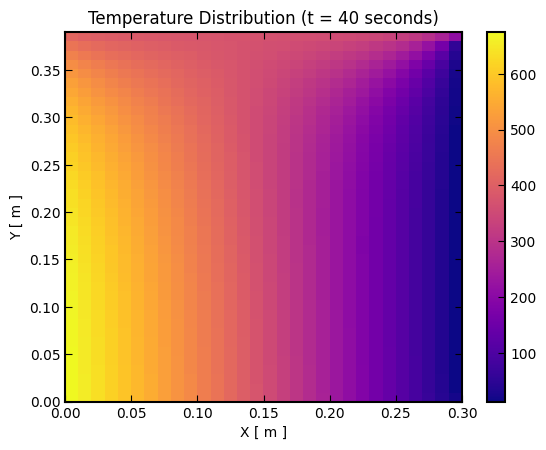

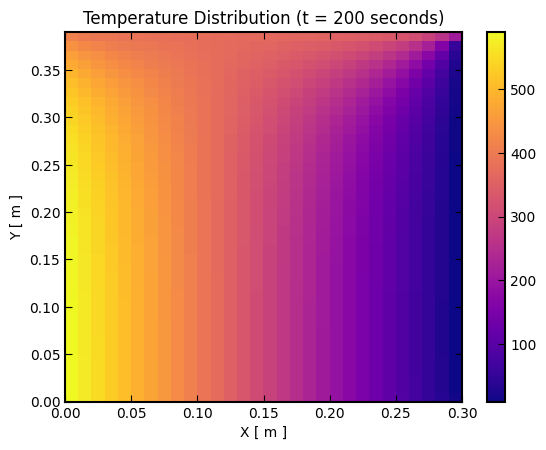

In [10]:
# plot time dependence at point (15,20)
trange = np.linspace(0,tstop,Nt)
plt.figure(figsize = [6,5])
plt.plot(trange,Tt[:,15,20])
plt.xlabel(" Time [ seconds ] ")
plt.ylabel("Temperature [ K ]")
plt.title('Temporal Profile at (15,20)')
plt.show()

# Temperature Distribution after 40 seconds
plt.imshow(np.transpose(Tt[int(round(40/dt))]), interpolation='none', origin='lower', aspect = 'auto', cmap = 'plasma', extent=(0, Lx, 0, Ly-dy))
plt.colorbar()
plt.xlabel("X [ m ]")
plt.ylabel("Y [ m ]")
plt.title("Temperature Distribution (t = 40 seconds)")
plt.show()

# Temperature Distribution after 200 seconds(close to steady state)
plt.imshow(np.transpose(Tt[-1]), interpolation='none', origin='lower', aspect = 'auto', cmap = 'plasma', extent=(0, Lx, 0, Ly-dy))
plt.colorbar()
plt.xlabel("X [ m ]")
plt.ylabel("Y [ m ]")
plt.title("Temperature Distribution (t = 200 seconds)")
plt.show()

# PART B: STEADY STATE SOLUTION

In [11]:
# Length, width and depth of the domain
Lx = 0.3
Ly = 0.4

# Thermo-physical properties
k = 1000.0    # Thermal conductivity

# Number of control volumes in x and y
Nx = 30
Ny = 40

# Length and width of an individual control volume
dx = Lx/Nx
dy = Ly/Ny

# Initial condition
To = 523.15

# Boundary conditions
qw = 20000.0
qe = 0.0

qs = 50000.0
Tn = 373.15

# coefficients
aw = (k/dx)*dy
ae = (k/dx)*dy
a_s = (k/dy)*dx
a_n = (k/dy)*dx
apo = 0

## boundary conditions [boundary type, position/orientation, value]
## boundary type: 0 corresponds with fixed temperature, 1 corresponds with specified flux/gradient
## position/orientation: 0 corresponds with west/east or flux into domain, 1 corresponds with south/north or flux out of domain
## value: specified temperature or flux
bcs = [1, 0, qs]
bcn = [0, 1, Tn]
bcw = [1, 0, qw]  
bce = [1, 1, qe]

# Temperature profile at previous time. will be multiplied by zero.
Tpast = To*np.ones((Nx,Ny))

# Guess of temperature field
T = np.zeros((Nx,Ny))

# Maximum absolute error
error = 1.0 

# absolute tolerance
tol = 1.0e-8

# Number of iterations
iters = 0

while(error > tol and iters < 10000):
    # Temperature field from previous iteration. Needed to compute maximum absolute relative error
    Tprev = np.copy(T) # copying necessary to avoid pre-mature convergence
    
    # Horizontal Sweep from west to east
    T = hsweep(aw, ae, a_s, a_n, apo, k, dx, dy, Nx, Ny, bcw, bce, bcs, bcn, T, Tpast, 0, Nx-1, 1)
    
    # Horizontal sweep from east to west
    #T = hsweep(aw, ae, a_s, a_n, apo, k, dx, dy, Nx, Ny, bcw, bce, bcs, bcn, T, Tpast, Nx-1, -1, -1)
    
    # Vertical sweep from south to north
    #T = vsweep(aw, ae, a_s, a_n, apo, k, dx, dy, Nx, Ny, bcw, bce, bcs, bcn, T, Tpast, 0, Ny-1, 1)
    
    # vertical sweep from north to south
    T = vsweep(aw, ae, a_s, a_n, apo, k, dx, dy, Nx, Ny, bcw, bce, bcs, bcn, T, Tpast, Ny-1, -1, -1)
    
    # update maximum absolute relative error
    error = np.max(np.abs(T - Tprev))
    
    # update number of iterations
    iters = iters + 1

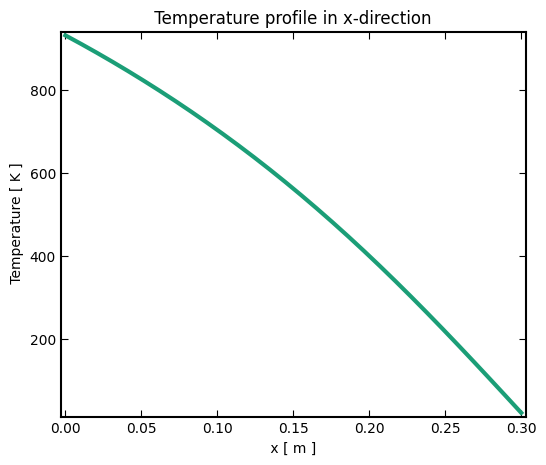

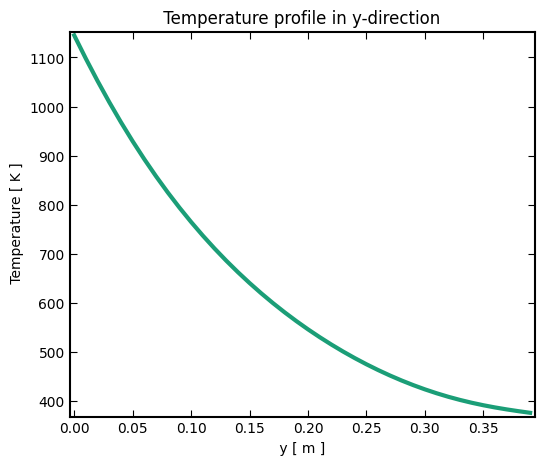

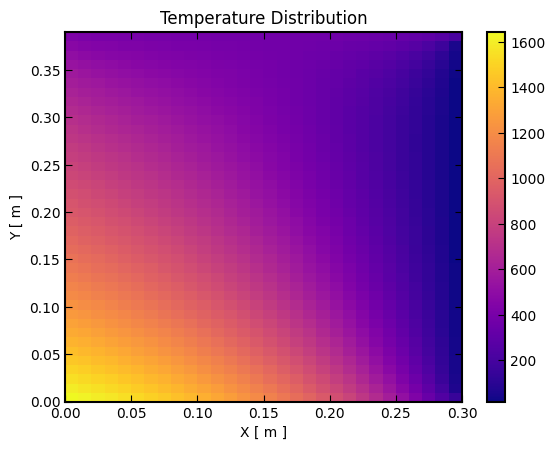

In [12]:
x = np.linspace(0,Lx,Nx)
y = np.linspace(0,Ly-dy,Ny)
# plot Temperature profile in x direction
plt.figure(figsize = [6,5])
plt.plot(x,T[:,20])
plt.xlabel(" x [ m ] ")
plt.ylabel(" Temperature [ K ]")
plt.title(" Temperature profile in x-direction ")
plt.show()
# plot temperature profile in y-direction
plt.figure(figsize = [6,5])
plt.plot(y, T[15,:])
plt.xlabel(" y [ m ] ")
plt.ylabel(" Temperature [ K ]")
plt.title(" Temperature profile in y-direction ")
plt.show()
# Plot solution surface
plt.imshow(np.transpose(T), interpolation='none', origin='lower', aspect = 'auto', cmap = 'plasma', extent=(0, Lx, 0, Ly-dy))
plt.colorbar()
plt.xlabel("X [ m ]")
plt.ylabel("Y [ m ]")
plt.title("Temperature Distribution")
plt.show()

# PART B: TRANSIENT SOLUTION

In [13]:
# Length, width and depth of the domain
Lx = 0.3
Ly = 0.4

# Thermo-physical properties
k = 1000.0    # Thermal conductivity
rhocp = 1.8e6  # volumetric heat capacity

# Number of control volumes in x and y
Nx = 30
Ny = 40

# Length and width of an individual control volume
dx = Lx/Nx
dy = Ly/Ny

# time interval (seconds)
dt = 1

# stop time (seconds)
tstop = 200

# Number of time steps
Nt = int(round(tstop/dt))

# Initial condition
To = 523.15

# Boundary conditions
qw = 20000.0
qe = 0.0

qs = 50000.0
Tn = 373.15

# coefficients
aw = (k/dx)*dy
ae = (k/dx)*dy
a_s = (k/dy)*dx
a_n = (k/dy)*dx
apo = (rhocp*dx*dy)/dt

## boundary conditions [boundary type, position/orientation, value]
## boundary type: 0 corresponds with fixed temperature, 1 corresponds with specified flux/gradient
## position/orientation: 0 corresponds with west/east or flux into domain, 1 corresponds with south/north or flux out of domain
## value: specified temperature or flux
bcs = [1, 0, qs]
bcn = [0, 1, Tn]
bcw = [1, 0, qw]  
bce = [1, 1, qe]

# Re-initialize temperature field
Tt = np.zeros((Nt,Nx,Ny))
# Set initial temperature profile
Tt[0,:,:] = To*np.ones((Nx,Ny))
for t in range(1,Nt):
    # Temperature profile at previous time 
    Tpast = np.copy(Tt[t-1,:,:])
    # Guess of temperature field at current time
    T = np.zeros((Nx,Ny))
    # Maximum absolute error
    error = 1.0 
    # absolute tolerance
    tol = 1.0e-8
    # Number of iterations
    iters = 0
    while(error > tol and iters < 10000):
        # Temperature field from previous iteration. Needed to compute maximum absolute relative error
        Tprev = np.copy(T) # copying necessary to avoid pre-mature convergence
    
        # Horizontal Sweep from west to east
        T = hsweep(aw, ae, a_s, a_n, apo, k, dx, dy, Nx, Ny, bcw, bce, bcs, bcn, T, Tpast, 0, Nx-1, 1)
    
        # Horizontal sweep from east to west
        #T = hsweep(aw, ae, a_s, a_n, apo, k, dx, dy, Nx, Ny, bcw, bce, bcs, bcn, T, Tpast, Nx-1, -1, -1)
    
        # Vertical sweep from south to north
        #T = vsweep(aw, ae, a_s, a_n, apo, k, dx, dy, Nx, Ny, bcw, bce, bcs, bcn, T, Tpast, 0, Ny-1, 1)
    
        # vertical sweep from north to south
        T = vsweep(aw, ae, a_s, a_n, apo, k, dx, dy, Nx, Ny, bcw, bce, bcs, bcn, T, Tpast, Ny-1, -1, -1)
    
        # update maximum absolute relative error
        error = np.max(np.abs(T - Tprev))
    
        # update number of iterations
        iters = iters + 1
    # Store final solution at current time
    Tt[t,:,:] = np.copy(T)

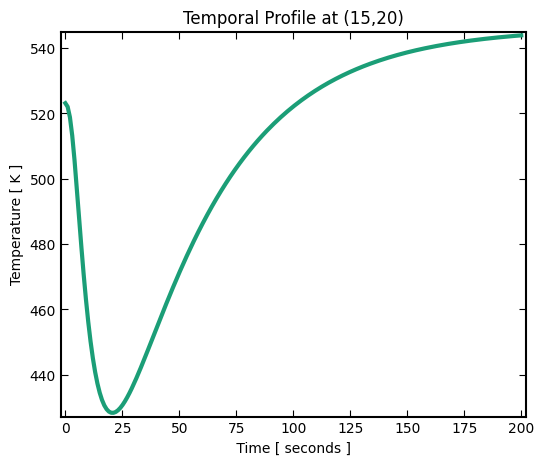

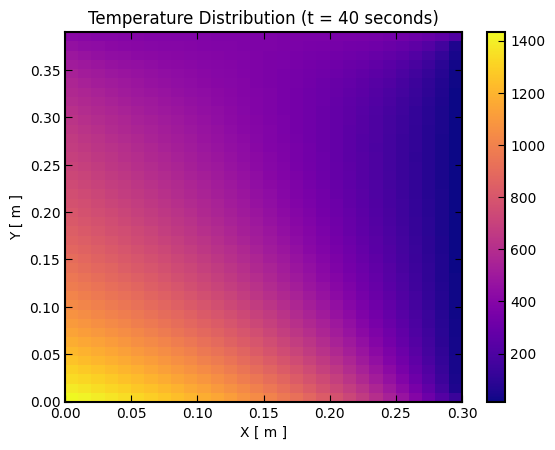

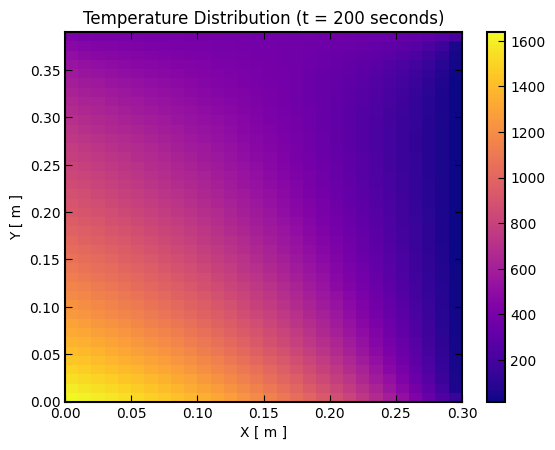

In [14]:
# plot time dependence at point (15,20)
trange = np.linspace(0,tstop,Nt)
plt.figure(figsize = [6,5])
plt.plot(trange,Tt[:,15,20])
plt.xlabel(" Time [ seconds ] ")
plt.ylabel("Temperature [ K ]")
plt.title('Temporal Profile at (15,20)')
plt.show()

# Temperature Distribution after 40 seconds
plt.imshow(np.transpose(Tt[int(round(40/dt))]), interpolation='none', origin='lower', aspect = 'auto', cmap = 'plasma', extent=(0, Lx, 0, Ly-dy))
plt.colorbar()
plt.xlabel("X [ m ]")
plt.ylabel("Y [ m ]")
plt.title("Temperature Distribution (t = 40 seconds)")
plt.show()

# Temperature Distribution after 200 seconds(close to steady state)
plt.imshow(np.transpose(Tt[-1]), interpolation='none', origin='lower', aspect = 'auto', cmap = 'plasma', extent=(0, Lx, 0, Ly-dy))
plt.colorbar()
plt.xlabel("X [ m ]")
plt.ylabel("Y [ m ]")
plt.title("Temperature Distribution (t = 200 seconds)")
plt.show()

# PART C: STEADY STATE SOLUTION

In [15]:
# Length, width and depth of the domain
Lx = 0.3
Ly = 0.4

# Thermo-physical properties
k = 1000.0

# Number of control volumes in x and y
Nx = 30
Ny = 40

# Length and width of an individual control volume
dx = Lx/Nx
dy = Ly/Ny

# Boundary conditions
qw = 20000.0
qe = 0.0

qs = 50000.0
Tn = 373.15

# coefficients
aw = (k/dx)*dy
ae = (k/dx)*dy
a_s = (k/dy)*dx
a_n = (k/dy)*dx

error = 1.0
tol = 1.0e-8
iters = 0
T = np.zeros((Nx,Ny))
while(error > tol and iters < 10000):
    Tprev = np.copy(T)
    for i in range(Nx):
        for j in range(Ny):
            # Corners grid points
            if(i == 0  and j ==0):
                ap = ae + a_n
                T[i,j] = (ae/ap)*T[i+1,j] + (qw/ap) + (a_n/ap) * T[i,j+1] + (qs/ap)
            elif(i == Nx-1 and j == 0):
                ap = aw + a_n
                T[i,j] = -(qe/ap) + (aw/ap)*T[i-1,j]  + (a_n/ap) * T[i,j+1] + (qs/ap)
            elif(i == 0 and j == Ny-1):
                ap = ae  + a_n + a_s
                T[i,j] = (ae/ap)*T[i+1,j] + (qw/ap) + (a_n/ap) * Tn + (a_s/ap)*T[i,j-1]
            elif(i == Nx-1 and j == Ny-1):
                ap = aw + a_n + a_s
                T[i,j] = -(qe/ap) + (aw/ap)*T[i-1,j] + (a_n/ap) * Tn + (a_s/ap)*T[i,j-1]
            # edge grid points
            elif(i == 0 and j > 0 and j < Ny-1):
                ap = ae + a_n + a_s
                T[i,j] = (ae/ap)*T[i+1,j] + (qw/ap) + (a_n/ap) * T[i,j+1] + (a_s/ap)*T[i,j-1]
            elif( i == Nx-1 and j > 0 and j < Ny-1):
                ap = aw + a_n + a_s
                T[i,j] = -(qe/ap) + (aw/ap)*T[i-1,j] + (a_n/ap) * T[i,j+1] + (a_s/ap)*T[i,j-1]
            elif (i > 0 and i < Nx-1 and j == 0):
                ap = ae + aw + a_n
                T[i,j] = (ae/ap)*T[i+1,j] + (aw/ap)*T[i-1,j] + (a_n/ap) * T[i,j+1] + (qs/ap)
            elif (i > 0 and i < Nx-1 and j == Ny-1):
                ap = ae + aw + a_n + a_s
                T[i,j] = (ae/ap)*T[i+1,j] + (aw/ap)*T[i-1,j] + (a_n/ap) * Tn + (a_s/ap)*T[i,j-1]
            else:
                ap = ae + aw + a_n + a_s
                T[i,j] = (ae/ap)*T[i+1,j] + (aw/ap)*T[i-1,j] + (a_n/ap) * T[i,j+1] + (a_s/ap)*T[i,j-1]
    error = np.max(np.abs(T - Tprev))
    iters = iters + 1

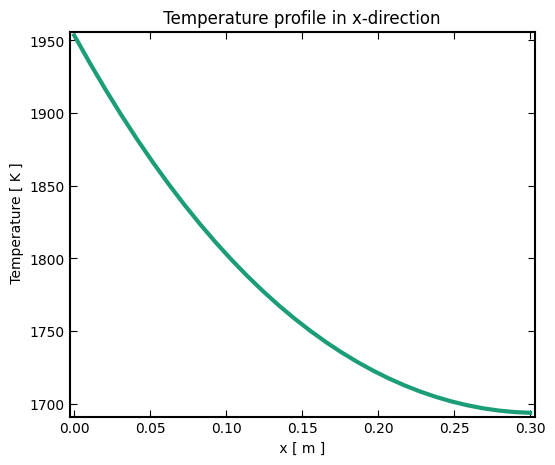

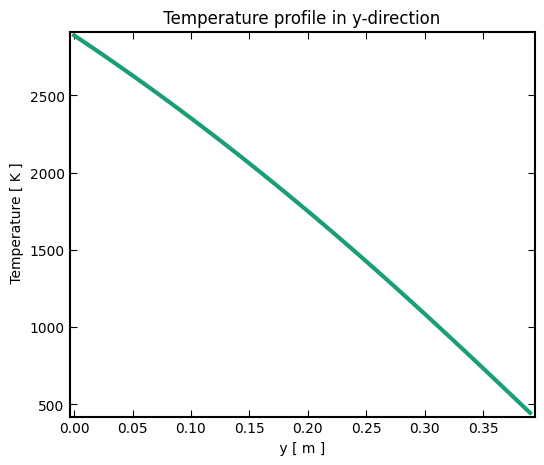

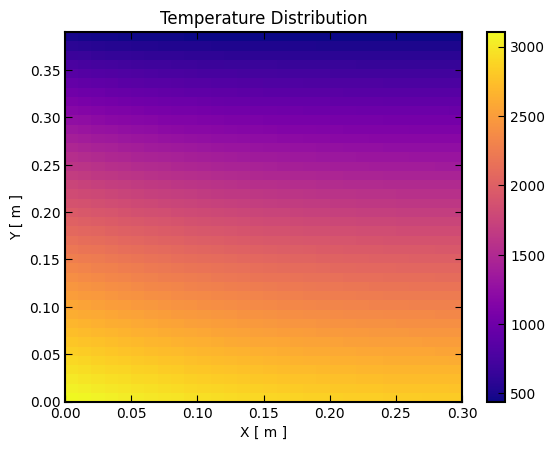

In [16]:
x = np.linspace(0,Lx,Nx)
y = np.linspace(0,Ly-dy,Ny)
# plot Temperature profile in x direction
plt.figure(figsize = [6,5])
plt.plot(x,T[:,20])
plt.xlabel(" x [ m ] ")
plt.ylabel(" Temperature [ K ]")
plt.title(" Temperature profile in x-direction ")
plt.show()
# plot temperature profile in y-direction
plt.figure(figsize = [6,5])
plt.plot(y, T[15,:])
plt.xlabel(" y [ m ] ")
plt.ylabel(" Temperature [ K ]")
plt.title(" Temperature profile in y-direction ")
plt.show()
# Plot solution surface
plt.imshow(np.transpose(T), interpolation='none', origin='lower', aspect = 'auto', cmap = 'plasma', extent=(0, Lx, 0, Ly-dy))
plt.colorbar()
plt.xlabel("X [ m ]")
plt.ylabel("Y [ m ]")
plt.title("Temperature Distribution")
plt.show()

# PART C: TRANSIENT SOLUTION

In [17]:
# Length, width and depth of the domain
Lx = 0.3
Ly = 0.4

# Thermo-physical properties
k = 1000.0
rhocp = 1.8e6    

# Number of control volumes in x and y
Nx = 30
Ny = 40

# Length and width of an individual control volume
dx = Lx/Nx
dy = Ly/Ny

# time step( based on apo > ae + aw + an + as to ensure coefficient of Tpo is greater than zero )
dt = 0.75 * (rhocp*dx*dy)/(2*k/dx*dy + 2*k/dy*dx)

# Stop time
tstop = 500

# Number of times
Nt = int(round(tstop/dt))

# Initial condition
To = 523.15

# Boundary conditions
qw = 20000.0
qe = 0.0

qs = 50000.0
Tn = 373.15

# coefficients
aw = (k/dx)*dy
ae = (k/dx)*dy
a_s = (k/dy)*dx
a_n = (k/dy)*dx
apo = (rhocp*dx*dy)/dt
ap = apo

# Initialize temperature field
Tt = np.zeros((Nt,Nx,Ny))
# Set initial temperature profile
Tt[0,:,:] = To*np.ones((Nx,Ny))

for t in range(1, Nt):
    Tprevt = np.copy(Tt[t-1])
    T = np.zeros((Nx,Ny))
    for i in range(Nx):
        for j in range(Ny):
            # Corners grid points
            if(i == 0  and j ==0):
                T[i,j] = (ae/ap)*Tprevt[i+1,j] + (qw/ap) + (a_n/ap) * Tprevt[i,j+1] + (qs/ap) + (apo - ae - a_n)/ap * Tprevt[i,j]
            elif(i == Nx-1 and j == 0):
                T[i,j] = -(qe/ap) + (aw/ap)*Tprevt[i-1,j]  + (a_n/ap) * Tprevt[i,j+1] + (qs/ap) + (apo - aw - a_n)/ap * Tprevt[i,j]
            elif(i == 0 and j == Ny-1):
                T[i,j] = (ae/ap)*Tprevt[i+1,j] + (qw/ap) + (a_n/ap) * Tn + (a_s/ap)*Tprevt[i,j-1] + (apo - ae - a_n - a_s)/ap * Tprevt[i,j]
            elif(i == Nx-1 and j == Ny-1):
                T[i,j] = -(qe/ap) + (aw/ap)*Tprevt[i-1,j] + (a_n/ap) * Tn + (a_s/ap)*Tprevt[i,j-1] + (apo - aw - a_n - a_s)/ap *Tprevt[i,j]
            # edge grid points
            elif(i == 0 and j > 0 and j < Ny-1):
                T[i,j] = (ae/ap)*Tprevt[i+1,j] + (qw/ap) + (a_n/ap) * Tprevt[i,j+1] + (a_s/ap)*Tprevt[i,j-1] + (apo + - ae - a_n - a_s)/ap * Tprevt[i,j]
            elif( i == Nx-1 and j > 0 and j < Ny-1):
                T[i,j] = -(qe/ap) + (aw/ap)*Tprevt[i-1,j] + (a_n/ap) * Tprevt[i,j+1] + (a_s/ap)*Tprevt[i,j-1] + (apo - aw - a_n - a_s)/ap * Tprevt[i,j]
            elif (i > 0 and i < Nx-1 and j == 0):
                T[i,j] = (ae/ap)*Tprevt[i+1,j] + (aw/ap)*Tprevt[i-1,j] + (a_n/ap) * Tprevt[i,j+1] + (qs/ap) + (apo - ae - aw - a_n)/ap * Tprevt[i,j]
            elif (i > 0 and i < Nx-1 and j == Ny-1):
                T[i,j] = (ae/ap)*Tprevt[i+1,j] + (aw/ap)*Tprevt[i-1,j] + (a_n/ap) * Tn + (a_s/ap)*Tprevt[i,j-1] + (apo - ae - aw - a_n - a_s)/ap * Tprevt[i,j]
            else:
                T[i,j] = (ae/ap)*Tprevt[i+1,j] + (aw/ap)*Tprevt[i-1,j] + (a_n/ap) * Tprevt[i,j+1] + (a_s/ap)*Tprevt[i,j-1] + (apo - ae - aw - a_n - a_s)/ap * Tprevt[i,j] 
    # Store current solution
    Tt[t,:,:] = T        

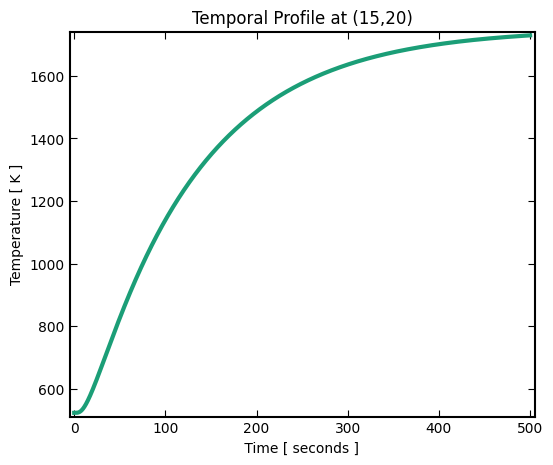

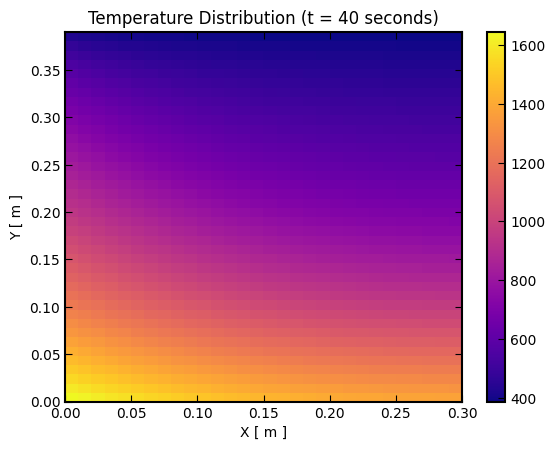

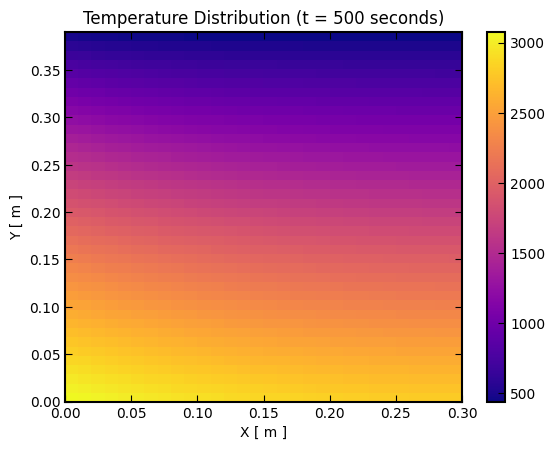

In [18]:
# plot time dependence at point (15,20)
trange = np.linspace(0,tstop,Nt)
plt.figure(figsize = [6,5])
plt.plot(trange,Tt[:,15,20])
plt.xlabel(" Time [ seconds ] ")
plt.ylabel("Temperature [ K ]")
plt.title('Temporal Profile at (15,20)')
plt.show()

# Temperature Distribution after 40 seconds
plt.imshow(np.transpose(Tt[int(round(40/dt))]), interpolation='none', origin='lower', aspect = 'auto', cmap = 'plasma', extent=(0, Lx, 0, Ly-dy))
plt.colorbar()
plt.xlabel("X [ m ]")
plt.ylabel("Y [ m ]")
plt.title("Temperature Distribution (t = 40 seconds)")
plt.show()

# Temperature Distribution after 500 seconds(close to steady state)
plt.imshow(np.transpose(Tt[-1]), interpolation='none', origin='lower', aspect = 'auto', cmap = 'plasma', extent=(0, Lx, 0, Ly-dy))
plt.colorbar()
plt.xlabel("X [ m ]")
plt.ylabel("Y [ m ]")
plt.title("Temperature Distribution (t = 500 seconds)")
plt.show()

***
# Concluding Remarks
***

* Temperatures obtained with fully implicit scheme are lower than those obtained with fully explicit scheme. 

* Steady state was achieved after approximately 200 seconds with a fully implicit scheme. For a fully explicit scheme, steady state was achieved around 500 seconds. 

* An initial decrease in temperature and then a gradual increase to steady state was observed for the implicit solution. For the explicit solution, the initial dip in temperature is not observed. 

* The implicit solution was dependent on the order in which the sweeps were performed. For example sweeping west to east and then north to south resulted in a different solution from sweeping west to east and then south to north. This is probably because the convergence of implicit solution is not based on a physical criterion, but on minimizing absolute/relative change between successive iterations. In the end, a choice had to be made on which order of the sweeps resulted in a more physically reasonable solution (e.g., does the final solution properly capture the boundary conditions?). 


***
***
# APPENDIX A: MORE GENERAL BOUNDARY CONDITIONS FOR FULLY IMPLICIT SCHEME

***
***

# FULLY IMPLICIT SCHEME (f = 1)

$a_p \phi_P = a_e \phi_E + a_w \phi_W + a_n \phi_N + a_s \phi_S + a_p^0 \phi_P^0$

$a_e = \frac{\Gamma_e \Delta y}{\left(\delta x\right)_e}, \: a_w = \frac{\Gamma_w \Delta y}{\left(\delta x\right)_w}$

$a_n = \frac{\Gamma_n \Delta x}{\left(\delta y\right)_n}, \: a_s = \frac{\Gamma_s \Delta x}{\left(\delta y\right)_s}$

$a_p^0 = \frac{\rho \Delta x \Delta y}{\Delta t}$

$a_p = a_e + a_w + a_n + a_s + a_p^0$

### For steady Problem: $a_P^0 = 0$
    
***

## BOUNDARY CONDITIONS

i = x-cordinate, j = y-cordinate

west boundary (bcw): i = 0, east boundary (bce): i = Nx - 1

south boundary (bcs): j = 0, north boundary (bcn): j = Ny - 1

Fixed value and flux boundary conditions considered for each boundary


***

### SOUTH-WEST CORNER (i=0, j=0)

$a_p \phi_P = a_e \phi_E + a_n \phi_n + \left[bcw + bcs + a_p^0 \phi_P^0\right]$

#### (bcw = flux and bcs = flux):

$a_p = a_p^0 + a_e + a_n$

#### (bcw = fixed value and bcs = flux):

$a_p = a_p^0 + a_e + a_n + a_w $

#### (bcw = fixed value and bcs = fixed value):

$a_p = a_p^0 + a_e + a_n + a_w + a_s $

#### (bcw = flux and bcs = fixed value):

$a_p = a_p^0 + a_e + a_n + a_s $

***

### SOUTH-EAST CORNER (i = Nx-1, j = 0)

$a_p \phi_P = a_w \phi_W + a_n \phi_n + \left[bce + bcs + a_p^0 \phi_P^0 \right]$

#### (bce = flux and bcs = flux):

$a_p = a_p^0 + a_w + a_n$

#### (bce = fixed value and bcs = flux):

$a_p = a_p^0 + a_w + a_n + a_e $

#### (bce = fixed value and bcs = fixed value):

$a_p = a_p^0 + a_w + a_n + a_e + a_s $

#### (bce = flux and bcs = fixed value):

$a_p = a_p^0 + a_w + a_n + a_s $

***

### NORTH-WEST CORNER (i = 0, j = Ny-1)

$a_p \phi_P = a_e \phi_E + a_s \phi_S + \left[bcw + bcn + a_p^0 \phi_P^0 \right]$

#### (bcw = flux and bcs = flux):

$a_p = a_p^0 + a_e + a_s $

#### (bcw = fixed value and bcs = flux):

$a_p = a_p^0 + a_e + a_s + a_w $

#### (bcw = fixed value and bcs = fixed value):

$a_p = a_p^0 + a_e + a_s + a_w + a_n $

#### (bcw = flux and bcs = fixed value):

$a_p = a_p^0 + a_e + a_s + a_n $

***

### NORTH-EAST CORNER (i = Nx-1, j = Ny-1)

$a_p \phi_P = a_w \phi_W + a_s \phi_S + \left[bce + bcn + a_p^0 \phi_P^0 \right]$

#### (bce = flux and bcs = flux):

$a_p = a_p^0 + a_w + a_s $

#### (bce = fixed value and bcs = flux):

$a_p = a_p^0 + a_w + a_s + a_e $

#### (bce = fixed value and bcs = fixed value):

$a_p = a_p^0 + a_w + a_s + a_e  + a_n $

#### (bce = flux and bcs = fixed value):

$a_p = a_p^0 + a_w + a_s + a_n $

***

## EDGE BOUNDARY CONDITIONS

### (i = 0 and 0 < j < Ny-1)

$a_p \phi_P = a_e \phi_E + a_n \phi_N + a_s \phi_S + \left[bcw + a_p^0 \phi_P^0 \right] $

#### (bcw  = flux)

$a_p = a_p^0 + a_e + a_n + a_s $

#### (bcw = fixed value)

$a_p = a_p^0 + a_e + a_n + a_s + a_w $

***

### (i = Nx-1 and 0 < j < Ny-1):

$a_p \phi_P = a_w \phi_W + a_n \phi_N + a_s \phi_S + \left[bce + a_p^0 \phi_P^0 \right]$

#### (bce = flux)

$a_p = a_p^0 + a_w  + a_n + a_s $

#### (bce = fixed value)

$a_p = a_p^0 + a_w +a_n + a_s + a_e $

***

### ( 0 < i < Nx-1 and j = 0)

$a_p \phi_P = a_e \phi_E + a_w \phi_W + a_n \phi_N + \left[ bcs + a_p^0\phi_P^0 \right]$

#### (bcs = flux)

$a_p = a_p^0 + a_e + a_w + a_n $

#### (bcs = fixed value)

$a_p = a_p^0 + a_e + a_w + a_n + a_s $


***


### ( 0< i < Nx-1 and j = Ny-1)

$a_p \phi_p = a_e \phi_E + a_w \phi_W  + a_s\phi_S + \left[bcn + a_p^0 \phi_P^0 \right]$  

#### (bcn = flux)

$a_p = a_p^0 + a_e + a_w + a_s $

#### (bcn = fixed value)

$a_p = a_p^0 + a_e + a_w + a_s + a_n $

***
***

# APPENDIX B: MORE GENERAL HORIZONTAL SWEEP (BASED ON APPENDIX A ABOVE)

In [19]:
def hsweepg(aw, ae, a_s, a_n, apo, gamma, dx, dy, Nx, Ny, bc1, bc2, bc3, bc4, phic, phit, start, stop, step):
    """
    Performs a horizontal sweep in the line by line method
    
    Uses triadiagonal matrix solver to solve each line
    
    Does not handle mixed boundary condition(e.g convection at surface) but can be extended to cover it
    
    Input Parameters:
    ----------------
    aw:    west coefficient
    ae:    east coefficient
    a_s:   south coefficient
    a_n:   north coefficient
    apo:   transient coefficient
    
    gamma: diffusion coefficient
    dx:    length of control volume in x
    dy:    width of control volume in y direction
    Nx:    Number of control volumes in x direction
    Ny:    Number of control volumes in y direction
    rhov:  density or volumetric heat capacity. set to zero for steady case
    dt:    time step. do not set to zero to avoid division by zero
    bc1:   list containing information about west boundary condition bc1 = [btype, pos, value]
           btype = 0 corresponds with fixed value and btype = 1 corresponds with flux
           pos = 0 corresponds with west/east/flux in, pos = 1 corresponds with south/north/flux out 
           
    bc2:   list containing information about the east boundary condition
    bc3:   list containing information about the south boundary condition
    bc4:   list containing information about the north boundary condition
    phic:  initial guess of phi field from previous iteration
    phit:  initial guess of phi field from previous time step
    start: integer representing the starting point. 0 for sweeping south to north, Ny-1 for sweeping north to south
    stop:  integer representing the stopping point. Ny-1 for sweeping south to north, -1 for sweeping north to south
    step:  integer representing the step size. 1 for sweeping south to north, -1 for sweeping north to south
           
    Output Parameters:
    -----------------
    phi:   Solved phi field
    """
    # boundary conditions
    bcw = boundaryCondition(bc1[0], bc1[1], bc1[2], gamma, dx, dy)
    bce = boundaryCondition(bc2[0], bc2[1], bc2[2], gamma, dx, dy)
    bcs = boundaryCondition(bc3[0], bc3[1], bc3[2], gamma, dx, dy)
    bcn = boundaryCondition(bc4[0], bc4[1], bc4[2], gamma, dx, dy)
    
    # initialize output variable
    phi = np.zeros((Nx,Ny))
    # construct vector a
    a =  a_s*np.ones(Ny)
    a[0] = 0.0
    # construct vector c
    c = a_n*np.ones(Ny)
    c[-1] = 0.0
    
    for i in range(start,stop,step):
        # construct vectors b and d for the west boundary
        if(i==0):
            # construct vector b
            if(bc1[0] == 0):
                ap = apo + ae + a_n + a_s + aw
                b = ap*np.ones(Ny)
                # correction for south-west corner
                if (bc3[0] == 1):
                    b[0] = apo + ae + a_n + aw
                elif(bc3[0] == 0):
                    b[0] = apo + ae + a_n + aw + a_s
                else:
                    pass
                # correction for north-west corner
                if(bc4[0] == 1):
                    b[-1] = apo + ae + a_s + aw
                elif(bc4[0] == 0):
                    b[-1] = apo + ae + a_s + aw + a_n
                else:
                    pass
            elif(bc1[0] == 1):
                ap = apo + ae + a_n + a_s
                b = ap*np.ones(Ny)
                # correction for south-west corner
                if(bc3[0] == 1):
                    b[0] = apo + ae + a_n
                elif(bc3[0] == 0):
                    b[0] = apo + ae + a_n + a_s
                else:
                    pass
                # correction for north-west corner
                if(bc4[0] == 1):
                    b[-1] = apo + ae + a_s
                elif(bc4[0] == 0):
                    b[-1] = apo + ae + a_s + a_n
                else:
                    pass
            else:
                pass
            # construct vector d
            d = ae*phic[i+1,:] + bcw + apo*phit[i,:]
            d[0] = d[0] + bcs
            d[-1] = d[-1] + bcn
        # construct vectors b and d for the east boundary
        elif(i == Nx-1):
            if(bc2[0] == 0):
                ap = apo + aw + a_n + a_s + ae
                b = ap*np.ones(Ny)
                # correction for south-east corner
                if (bc3[0] == 1):
                    b[0] = apo  + aw + a_n + ae
                elif (bc3[0] == 0):
                    b[0] = apo + aw + a_n + ae + a_s
                else:
                    pass
                # correction for north-east corner
                if(bc4[0] == 1):
                    b[-1] = apo + aw + a_s + ae
                elif(bc4[0] == 0):
                    b[-1] = apo + aw + a_s + ae + a_n
                else:
                    pass
            elif(bc2[0] == 1):
                ap = apo + aw + a_n + a_s
                b = ap*np.ones(Ny)
                # correction for south-east corner
                if (bc3[0] == 1):
                    b[0] = apo + aw + a_n
                elif (bc3[0] == 0):
                    b[0] = apo + aw + a_n + a_s
                else:
                    pass
                # correction for north-east corner
                if(bc4[0] == 1):
                    b[-1] = apo  + aw + a_s
                elif(bc4[0] == 0):
                    b[-1] = apo + aw + a_s  + a_n
                else:
                    pass
            else:
                pass
            # construct vector d
            d = aw*phic[i-1,:] + bce + apo*phit[i,:]
            d[0] = d[0] + bcs
            d[-1] = d[-1] + bcn
        # All lines in-between west and east boundaries
        else:
            ap = ae + aw + a_n + a_s + apo
            b = ap*np.ones(Ny)
            # correction for southern boundary
            if(bc3[0] == 1):
                b[0] = apo + ae + aw + a_n
            elif(bc3[0] == 0):
                b[0] = apo + ae + aw + a_n + a_s
            else:
                pass
            # correction for northern boundary
            if(bc4[0] == 1):
                b[-1] = apo + ae + aw + a_s
            elif(bc4[0] == 0):
                b[-1] = apo + ae + aw + a_s + a_n
            else:
                pass
            #construct vector d
            d = ae*phic[i+1,:] + aw*phic[i-1,:] + apo*phit[i,:]
            d[0] = d[0] + bcs
            d[-1] = d[-1] + bcn
            
        # use tridiagonal matrix solver to solve current line
        phi[i,:] = tdma(a,b,c,d)
    # return solution  
    return phi

# APPENDIX C: MORE GENERAL VERTICAL SWEEP ( BASED ON APPENDIX A ABOVE)

In [20]:
def vsweepg(aw, ae, a_s, a_n, apo, gamma, dx, dy, Nx, Ny, bc1, bc2, bc3, bc4, phic, phit, start, stop, step):
    """
    Performs a vertical sweep in the line by line method
    
    Uses triadiagonal matrix solver to solve each line
    
    Does not handle mixed boundary condition(e.g convection at surface) but can be extended to cover it
    
    Input Parameters:
    ----------------
    aw:    west coefficient
    ae:    east coefficient
    a_s:   south coefficient
    a_n:   north coefficient
    apo:   transient coefficient
    
    gamma: diffusion coefficient
    dx:    length of control volume in x
    dy:    width of control volume in y direction
    Nx:    Number of control volumes in x direction
    Ny:    Number of control volumes in y direction
    rhov:  density or volumetric heat capacity. set to zero for steady case
    dt:    time step. do not set to zero to avoid division by zero
    bc1:   list containing information about west boundary condition bc1 = [btype, pos, value]
           btype = 0 corresponds with fixed value and btype = 1 corresponds with flux
           pos = 0 corresponds with west/east/flux in, pos = 1 corresponds with south/north/flux out 
           
    bc2:   list containing information about the east boundary condition
    bc3:   list containing information about the south boundary condition
    bc4:   list containing information about the north boundary condition
    phic:  initial guess of phi field from previous iteration
    phit:  initial guess of phi field from previous time step
    start: integer representing the starting point. 0 for sweeping south to north, Ny-1 for sweeping north to south
    stop:  integer representing the stopping point. Ny-1 for sweeping south to north, -1 for sweeping north to south
    step:  integer representing the step size. 1 for sweeping south to north, -1 for sweeping north to south
           
    Output Parameters:
    -----------------
    phi:   Solved phi field
    """
    # boundary conditions
    bcw = boundaryCondition(bc1[0], bc1[1], bc1[2], gamma, dx, dy)
    bce = boundaryCondition(bc2[0], bc2[1], bc2[2], gamma, dx, dy)
    bcs = boundaryCondition(bc3[0], bc3[1], bc3[2], gamma, dx, dy)
    bcn = boundaryCondition(bc4[0], bc4[1], bc4[2], gamma, dx, dy)
    
    # initialize output variable
    phi = np.zeros((Nx,Ny))
    # construct vector a
    a =  aw*np.ones(Ny)
    a[0] = 0.0
    # construct vector c
    c = ae*np.ones(Ny)
    c[-1] = 0.0
    for j in range(start,stop,step):
        # first line at the southern boundary
        if(j == 0):
            # fixed value specified for southern boundary
            if(bc3[0] == 0):
                # construct vector b
                ap = apo + ae + aw + a_n + a_s
                b = ap*np.ones(Nx)
                # correct b for west boundary point
                if(bc1[0] == 0):
                    b[0] = apo + ae + a_n + aw + a_s
                elif(bc1[0] == 1):
                    b[0] = apo + ae + a_n + a_s
                else:
                    pass
                # correct b for east boundary point
                if(bc2[0] == 0):
                    b[-1] = apo + aw + a_n + ae + a_s
                elif(bc2[0] == 1):
                    b[-1] = apo + aw + a_n + a_s
                else:
                    pass
            # flux specified for southern boundary
            elif(bc3[0] == 1):
                # construct vector b
                ap = apo + ae + aw + a_n
                b = ap*np.ones(Nx)
                # correct b for west boundary point
                if(bc1[0] == 0):
                    b[0] = apo + ae + a_n  + aw
                elif(bc1[0] == 1):
                    b[0] = apo + ae + a_n
                else:
                    pass
                # correct b for east boundary point
                if(bc2[0] == 0):
                    b[-1] = apo + aw + a_n + ae
                elif(bc2[0] == 1):
                    b[-1] = apo  + aw + a_n
                else:
                    pass
            else:
                pass
            # construct vector d
            d = a_n * phic[:,j+1] + bcs + apo*phit[:,j]
            d[0] = d[0] + bcw
            d[-1] = d[-1] + bce
        # last line at the northern boundary
        elif(j == Ny-1):
            # fixed value specified for northern boundary
            if(bc4[0] == 0):
                # construct vector b
                ap = apo + ae + aw + a_s + a_n
                b = ap*np.ones(Nx)
                # correct b for west boundary point
                if(bc1[0] == 0):
                    b[0] = apo + ae + a_s + aw + a_n
                elif(bc1[0] == 1):
                    b[0] = apo + ae + a_s + a_n
                else:
                    pass
                # correct b for east boundary point
                if(bc2[0] == 0):
                    b[-1] = apo + aw + a_s + ae + a_n
                elif(bc2[0] == 1):
                    b[-1] = apo + aw + a_s + a_n
                else:
                    pass
            # flux specified for northern boundary
            elif(bc4[0] == 1):
                # construct vector b
                ap = apo + ae + aw + a_s
                b = ap*np.ones(Nx)
                # correct b for west boundary point
                if(bc1[0] == 0):
                    b[0] = apo + ae + a_s + aw
                elif(bc1[0] == 1):
                    b[0] = apo + ae + a_s
                else:
                    pass
                # correct b for east boundary point
                if(bc2[0] == 0):
                    b[-1] = apo + aw + a_s + ae
                elif(bc2[0] == 1):
                    b[-1] = apo + aw + a_s
                else:
                    pass
            else:
                pass
            # construct vector d
            d = a_s*phic[:,j-1] + bcn + apo*phit[:,j]
            d[0] = d[0] + bcw
            d[-1] = d[-1] + bce
        # all lines in-between southern and nothern boundary
        else:
            ap = ae + aw + a_n + a_s + apo
            b = ap*np.ones(Ny)
            # correction for west boundary point
            if(bc1[0] == 1):
                b[0] = apo + ae + a_n + a_s
            elif(bc1[0] == 0):
                b[0] = apo + ae + a_n + a_s + aw
            else:
                pass
            # correction for east boundary point
            if(bc2[0] == 1):
                b[-1] = apo + aw + a_n + a_s
            elif(bc2[0] == 0):
                b[-1] = apo + aw + a_n + a_s + ae
            else:
                pass
            #construct vector d
            d = a_n*phic[:,j+1] + a_s*phic[:,j-1] + apo*phit[:,j]
            d[0] = d[0] + bcw
            d[-1] = d[-1] + bce
            
        # use tridiagonal matrix solver to solve current line
        phi[:,j] = tdma(a,b,c,d)
    # return solution
    return phi